## 2. Grid Search

Grid search is arguably the most basic hyperparameter tuning method. With this technique, we simply build a model for each possible combination of all of the hyperparameter values provided, evaluating each model, and selecting the architecture which produces the best results.<br>
Grid-search does NOT only apply to one model type but can be applied across machine learning to calculate the best parameters to use for any given model.<br>
<br>



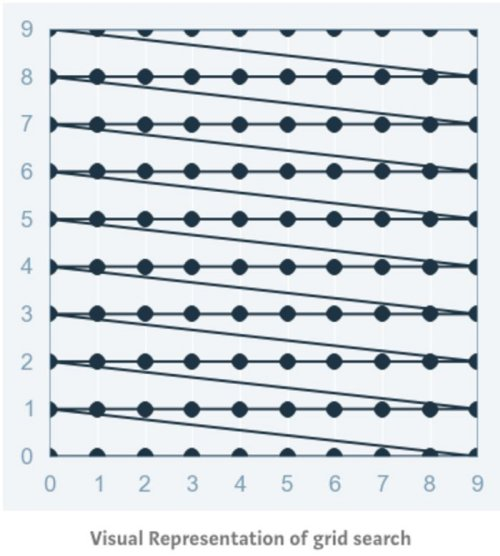

For example, a typical soft-margin SVM classifier equipped with an RBF kernel has at least two hyperparameters that need to be optimized for good performance on unseen data: a regularization constant C and a kernel hyperparameter γ. Both parameters are continuous, so to perform grid search, one selects a finite set of “reasonable” values for each, let’s say<br>
    

Grid search then trains an SVM with each pair (C, γ) in the cartesian product of these two sets and evaluates their performance on a held-out validation set (or by internal cross-validation on the training set, in which case multiple SVMs are trained per pair). Finally, the grid search algorithm outputs the settings that achieved the highest score in the validation procedure.

One of the drawbacks of grid search is that when it comes to dimensionality, it suffers when evaluating the number of hyperparameters grows exponentially. However, there is no guarantee that the search will produce the perfect solution, as it usually finds one by aliasing around the right set.

 

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data,columns=iris['feature_names'])

In [5]:
df['target'] = iris['target']

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = df['target']

In [8]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)

In [9]:
clf.fit(iris.data, iris.target)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [10]:
clf.cv_results_

{'mean_fit_time': array([0.00160031, 0.00479918, 0.        , 0.00160046, 0.        ,
        0.00320034]),
 'std_fit_time': array([0.00320063, 0.00639882, 0.        , 0.00320091, 0.        ,
        0.0039196 ]),
 'mean_score_time': array([0.        , 0.00160027, 0.00960088, 0.00480061, 0.00640116,
        0.        ]),
 'std_score_time': array([0.        , 0.00320053, 0.01175863, 0.00391968, 0.00933035,
        0.        ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [11]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001600,0.003201,0.000000,0.000000,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.004799,0.006399,0.001600,0.003201,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000000,0.000000,0.009601,0.011759,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001600,0.003201,0.004801,0.003920,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000000,0.000000,0.006401,0.009330,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.003200,0.003920,0.000000,0.000000,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [13]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [12]:
print(clf.best_score_)
print(clf.best_params_) #print the best parameter used for the highest score of the model.

0.9800000000000001
{'C': 1, 'kernel': 'rbf'}


In [14]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_